In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation

from yellowbrick.cluster import KElbowVisualizer


sys.path.append('../src')
from clean_df import *
from sort_lyrics_to_genre import *
from countvec_cap2 import *

pd.options.display.max_rows = 200

In [2]:
ly = pd.read_csv('../data/1950_2019_with lyrics.csv')
ly.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
len(ly)

28372

In [4]:
ly.loc[ly['track_name'] == 'thickfreakness']

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
15648,the black keys,thickfreakness,2003,blues,darlin care want hold heart hold near whisper ...,12,0.004049,0.004049,0.004049,0.004049,...,0.004049,0.004049,0.318748,0.790067,0.571285,0.915992,0.509481,0.743736,romantic,0.242857


In [5]:
ly.loc[ly['release_date']>1999]

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
4751,3 doors down,duck and run,2000,pop,world unimportant free country tell cost live ...,71,0.000877,0.000877,0.407802,0.000877,...,0.284506,0.000877,0.500704,0.773069,0.014959,0.000072,0.849547,0.919917,world/life,0.285714
4752,ricky nelson,hello mary lou,2000,pop,hello goodbye heart sweet know hello goodbye h...,58,0.000923,0.000923,0.000923,0.000923,...,0.140091,0.000923,0.570021,0.631387,0.372489,0.000001,0.925804,0.601589,romantic,0.285714
4753,modest mouse,perfect disguise,2000,pop,perfect disguise look okay best worst cause co...,32,0.002105,0.175750,0.002105,0.002105,...,0.140042,0.070702,0.493122,0.653565,0.732931,0.209514,0.120981,0.359339,obscene,0.285714
4754,joe,i believe in you,2000,pop,believe dream believe like arrow heart believe...,55,0.001224,0.001224,0.725084,0.001224,...,0.058538,0.001224,0.457381,0.760634,0.176706,0.000000,0.198269,0.525511,world/life,0.285714
4755,fuel,empty spaces,2000,pop,mister maybe lend hand help drown starve soull...,49,0.001504,0.384026,0.001504,0.001504,...,0.313281,0.001504,0.469295,0.814630,0.000062,0.053644,0.343570,0.943942,violence,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,0.001284,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,0.001504,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286


In [6]:
#subsets per genre
hiphop = sort_by_genre(ly, 'hip hop')
rock = sort_by_genre(ly, 'rock')
country = sort_by_genre(ly, 'country')
blues = sort_by_genre(ly, 'blues')
jazz = sort_by_genre(ly, 'jazz')
reggae = sort_by_genre(ly, 'reggae')
pop = sort_by_genre(ly, 'pop')


#all words per genre
hiphopwords= " ".join(hiphop['lyrics'])
rockwords= " ".join(rock['lyrics'])
blueswords= " ".join(blues['lyrics'])
countrywords= " ".join(country['lyrics'])
reggaewords= " ".join(reggae['lyrics'])
popwords= " ".join(pop['lyrics'])
jazzwords= " ".join(jazz['lyrics'])

In [7]:
genre_lyrics = pd.concat([ly['genre'], ly['lyrics']], axis=1)
genre_lyrics.head()

,genre,lyrics
0,pop,hold time feel break feel untrue convince spea...
1,pop,believe drop rain fall grow believe darkest ni...
2,pop,sweetheart send letter goodbye secret feel bet...
3,pop,kiss lips want stroll charm mambo chacha merin...
4,pop,till darling till matter know till dream live ...


In [8]:
#Panda dataset Genre: all words in all lyrics
rock_lyrics = lyrics_to_genre(sort_by_genre(ly, 'rock'), 'rock')
hiphop_lyrics = lyrics_to_genre(sort_by_genre(ly, 'hip hop'), 'hip hop')
pop_lyrics = lyrics_to_genre(sort_by_genre(ly, 'pop'), 'pop')
reggae_lyrics = lyrics_to_genre(sort_by_genre(ly, 'reggae'), 'reggae')
jazz_lyrics = lyrics_to_genre(sort_by_genre(ly, 'jazz'), 'jazz')
country_lyrics = lyrics_to_genre(sort_by_genre(ly, 'country'), 'country')
blues_lyrics = lyrics_to_genre(sort_by_genre(ly, 'blues'), 'blues')

In [9]:
my_stop_words = frozenset({'a','about','above','across','after','afterwards','again','against','all',
           'almost','alone','along','already','also','although','always','am','among','amongst','amoungst',
           'amount','an','and','another','any','anyhow','anyone','anything','anyway','anywhere','are','around',
           'as',
           'at',
           'baby',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides',
           'between',
           'beyond',
           'bill',
           'both',
           'bottom',
           'but',
           'by',
           'call',
           'can',
           'cannot',
           'cant',
           'cause',
           'co',
           'come',
           'con',
           'could',
           'couldnt',
           'cry',
           'de',
           'describe',
           'detail',
           'do',
           'done',
           'down',
           'due',
           'during',
           'each',
           'eg',
           'eight',
           'either',
           'eleven',
           'else',
           'elsewhere',
           'empty',
           'enough',
           'etc',
           'even',
           'ever',
           'every',
           'everyone',
           'everything',
           'everywhere',
           'except',
           'few',
           'fifteen',
           'fifty',
           'fill',
           'find',
           'fire',
           'first',
           'five',
           'for',
           'former',
           'formerly',
           'forty',
           'found',
           'four',
           'from',
           'front',
           'full',
           'further',
           'get',
           'give',
           'go',
           'gonna',
           'had',
           'has',
           'hasnt',
           'have',
           'he',
           'hence',
           'her',
           'here',
           'hereafter',
           'hereby',
           'herein',
           'hereupon',
           'hers',
           'herself',
           'him',
           'himself',
           'his',
           'hold',
           'how',
           'however',
           'hundred',
           'i',
           'ie',
           'if',
           'in',
           'inc',
           'indeed',
           'interest',
           'into',
           'is',
           'it',
           'its',
           'itself',
           'keep',
           'know',
           'last',
           'latter',
           'latterly',
           'least',
           'less',
           'like',
           'ltd',
           'made',
           'many',
           'may',
           'me',
           'meanwhile',
           'might',
           'mill',
           'mine',
           'more',
           'moreover',
           'most',
           'mostly',
           'move',
           'much',
           'must',
           'my',
           'myself',
           'name',
           'namely',
           'neither',
           'never',
           'nevertheless',
           'next',
           'nigga',
           'niggas',
           'niggaz',
           'nine',
           'no',
           'nobody',
           'none',
           'noone',
           'nor',
           'not',
           'nothing',
           'now',
           'nowhere',
           'of',
           'off',
           'often',
           'on',
           'once',
           'one',
           'only',
           'onto',
           'or',
           'other',
           'others',
           'otherwise',
           'our',
           'ours',
           'ourselves',
           'out',
           'over',
           'own',
           'part',
           'per',
           'perhaps',
           'please',
           'put',
           'rather',
           're',
           'right',
           'same',
           'say',
           'see',
           'seem',
           'seemed',
           'seeming',
           'seems',
           'serious',
           'several',
           'she',
           'should',
           'show',
           'side',
           'since',
           'sincere',
           'six',
           'sixty',
           'so',
           'some',
           'somehow',
           'someone',
           'something',
           'sometime',
           'sometimes',
           'somewhere',
           'still',
           'such',
           'system',
           'take',
           'ten',
           'than',
           'that',
           'the',
           'their',
           'them',
           'themselves',
           'then',
           'thence',
           'there',
           'thereafter',
           'thereby',
           'therefore',
           'therein',
           'thereupon',
           'these',
           'they',
           'thick',
           'thin',
           'thing',
           'third',
           'this',
           'those',
           'though',
           'three',
           'through',
           'throughout',
           'thru',
           'thus',
           'time',
           'to',
           'together',
           'too',
           'top',
           'toward',
           'towards',
           'twelve',
           'twenty',
           'two',
           'un',
           'under',
           'until',
           'up',
           'upon',
           'us',
           'very',
           'via',
           'was',
           'we',
           'well',
           'were',
           'what',
           'whatever',
           'when',
           'whence',
           'whenever',
           'where',
           'whereafter',
           'whereas',
           'whereby',
           'wherein',
           'whereupon',
           'wherever',
           'whether',
           'which',
           'while',
           'whither',
           'who',
           'whoever',
           'whole',
           'whom',
           'whose',
           'why',
           'will',
           'with',
           'within',
           'without',
           'would',
           'yeah',
           'year',
           'yet',
           'you',
           'your',
           'yours',
           'yourself',
           'yourselves'})

In [10]:
tfidf_vec = TfidfVectorizer(stop_words=my_stop_words)
count_vec = CountVectorizer(stop_words=my_stop_words)

In [11]:
# from sklearn.cluster import KMeans

# n_clusters = 12
# X2 = vectorizer(ly, count_vec)
# X = vectorizer(ly, tfidf_vec)
# kmeans = KMeans(n_clusters=n_clusters, random_state=0)
# prediction = kmeans.fit_predict(X)

## Tuning Models

## LDA

In [12]:
# # LDA

# # LDA can only uses raw term counts
# tf_feature_names = count_vec.get_feature_names() #theses are the words in our bag of words

# lda = LatentDirichletAllocation(n_components=5, learning_method='online',random_state=0, learning_decay=0.5)
# lda.fit(X2)
# lda.perplexity(X2)

In [13]:
# lda1 = LatentDirichletAllocation(n_components=5, learning_method='online',random_state=0, learning_decay=1.0)
# lda1.fit(X2)
# lda1.perplexity(X2)

In [14]:
# lda3 = LatentDirichletAllocation(n_components=5, learning_method='online',random_state=0)
# lda3.fit(X2)
# lda3.perplexity(X2)

In [15]:
# lda3 = LatentDirichletAllocation(n_components=10, learning_method='online',random_state=0)
# lda3.fit(X2)
# lda3.score(X2)

In [16]:
# lda4 = LatentDirichletAllocation(n_components=12, learning_method='online',random_state=0)
# lda4.fit(X2)
# lda4.score(X2)

In [17]:
# lda5 = LatentDirichletAllocation(n_components=15, learning_method='online',random_state=0)
# lda5.fit(X2)
# lda5.score(X2)

In [18]:
# lda6 = LatentDirichletAllocation(n_components=5, learning_method='online',random_state=0)
# lda6.fit(X2)
# lda6_score = lda6.score(X2)
# lda6_score

In [19]:
# lda7 = LatentDirichletAllocation(n_components=4, learning_method='online',random_state=0)
# lda7.fit(X2)
# lda7_score = lda7.score(X2)
# lda7_score

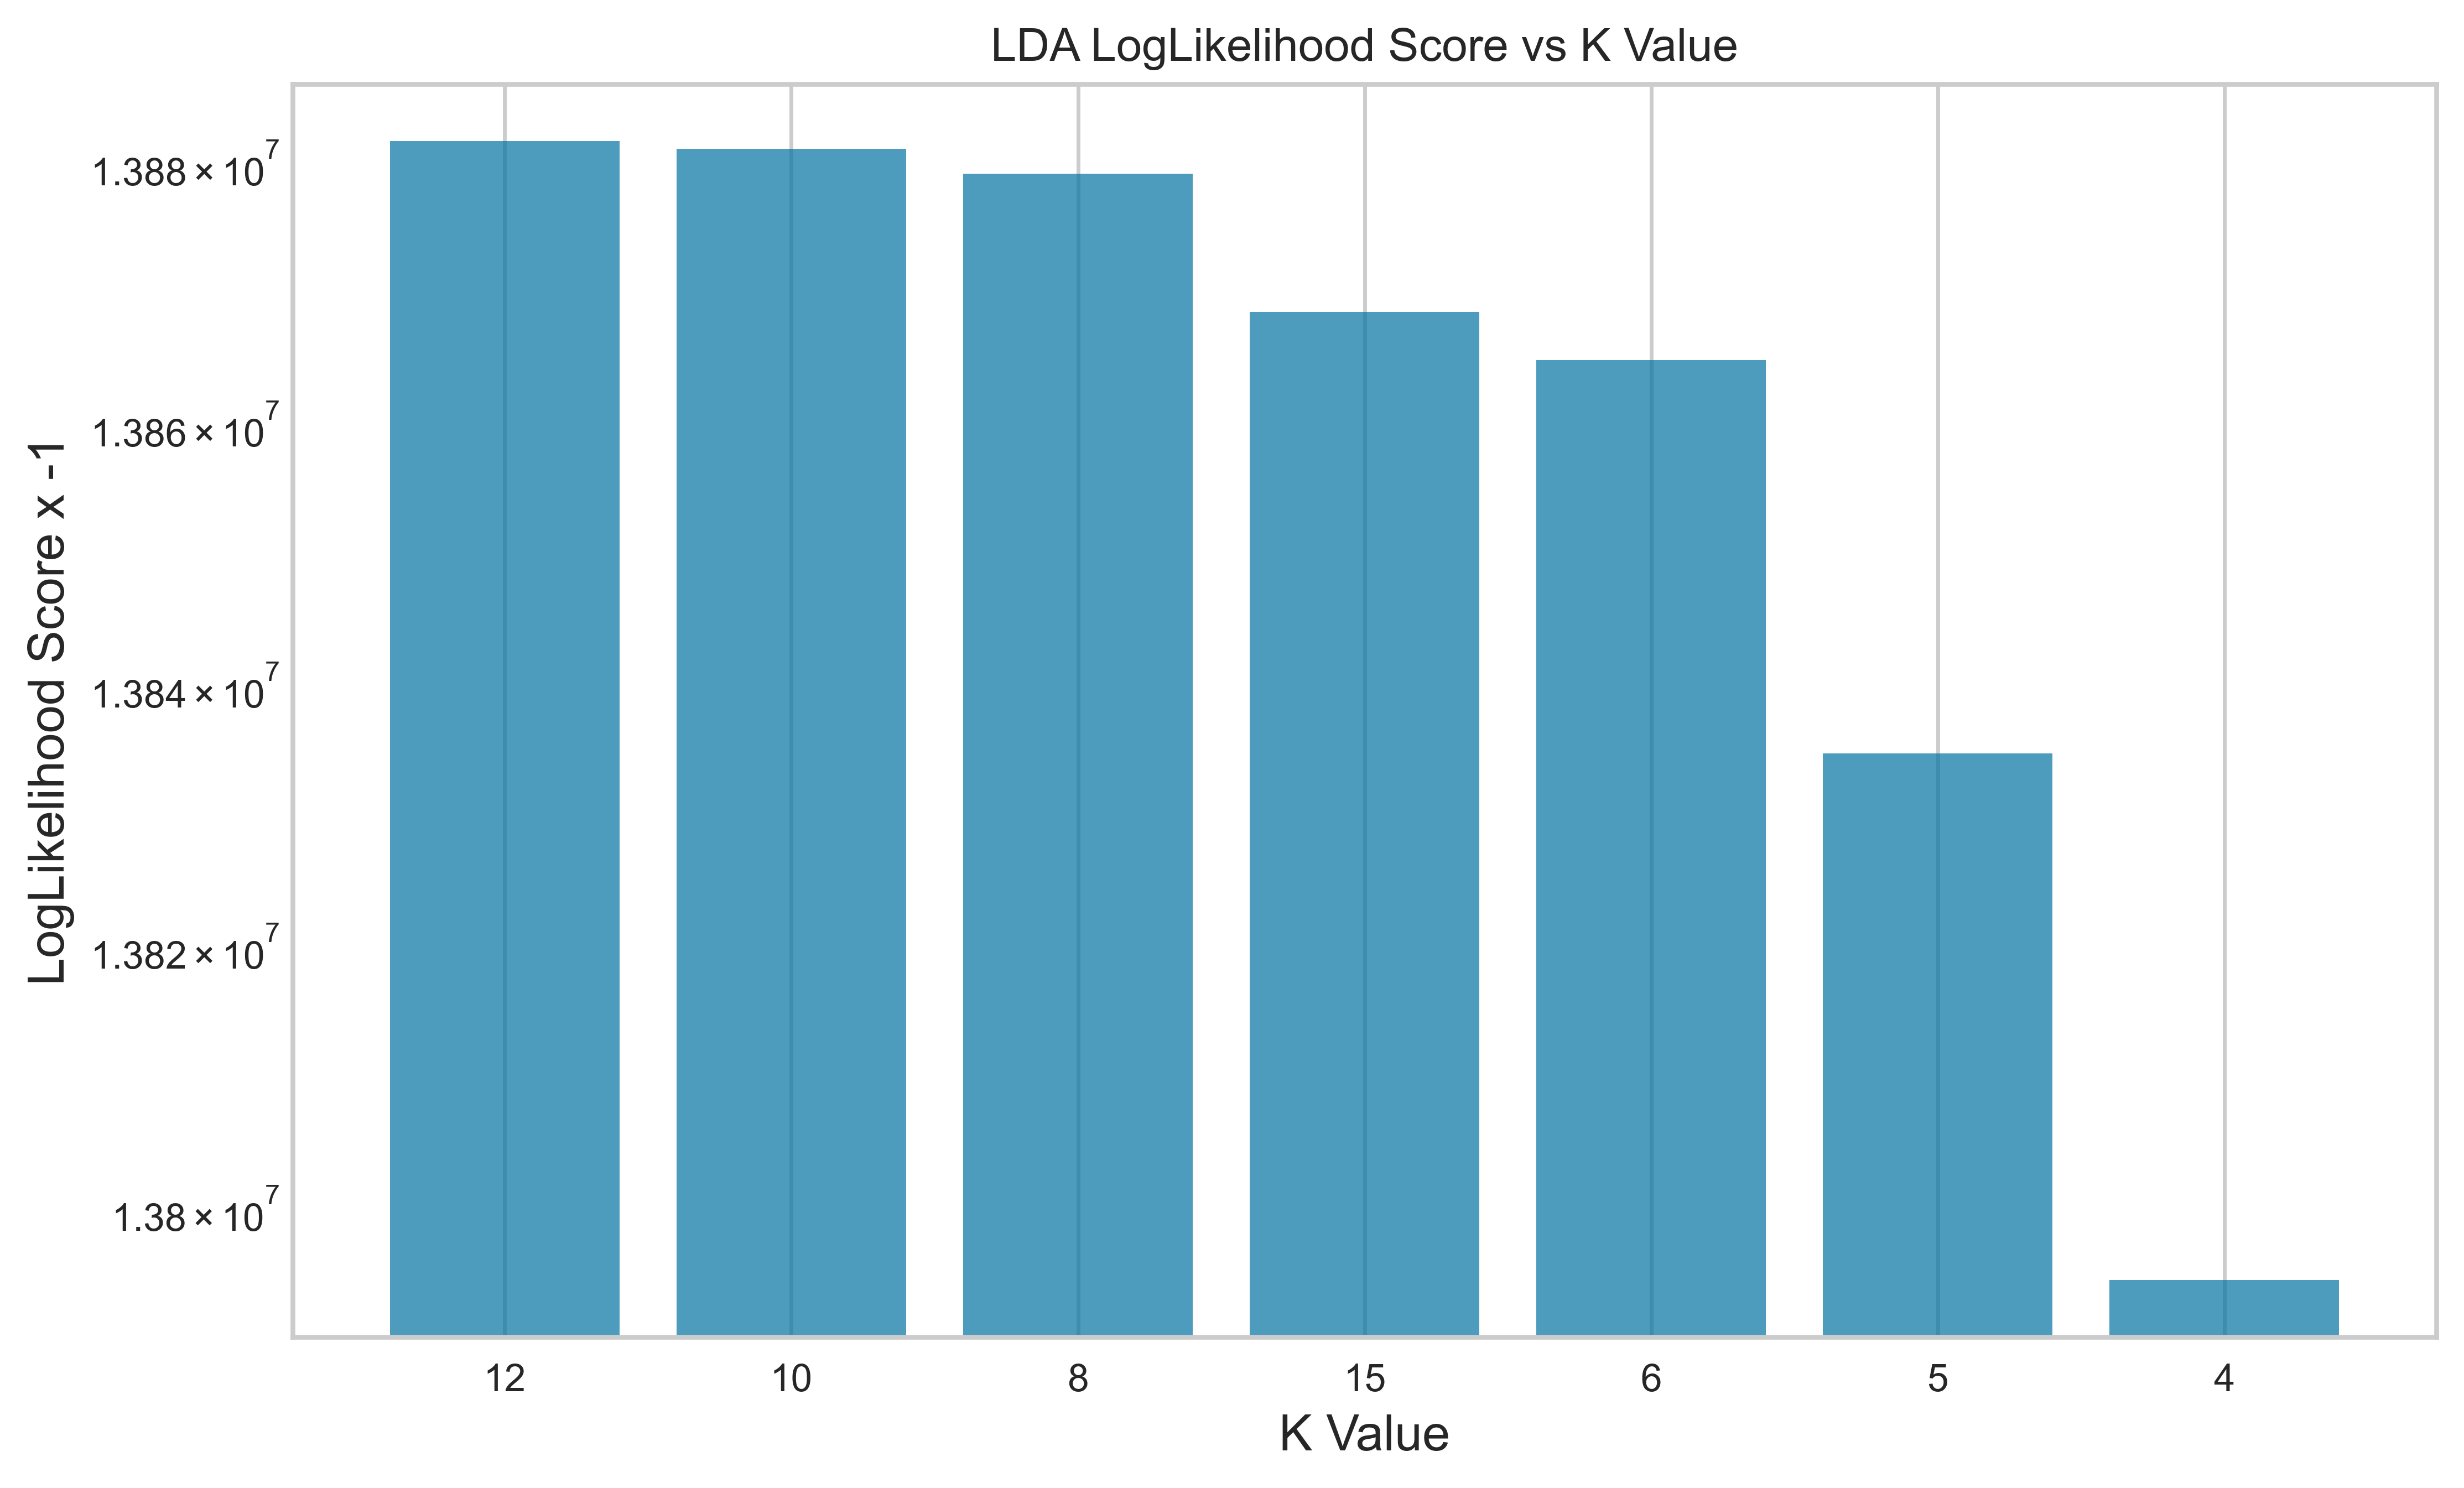

In [20]:
fig, ax = plt.subplots(figsize=(10,6), dpi=500)

y = pd.Series({'6':13865039.19,
                '8':13879343.457206184,
                '10':13881247.966845043,
                '12':13881881.754632398,
                '15':13868745.58349507,
                '5':13834934.496505208,
                '4':13794715.81973467}).sort_values(ascending=False)


ax.bar(y.keys(), y, alpha=0.7)

ax.set_title('LDA LogLikelihood Score vs K Value')

ax.set_xlabel('K Value', fontsize=13)
ax.set_ylabel('LogLikelihood Score x -1', fontsize=13)


ax.set_yscale('log')
# plt.savefig('../images/lda_score.png')
# plt.show();


In [21]:
# lda = LatentDirichletAllocation(n_components=4, learning_method='online',random_state=0)
# lda.fit(X2)
# lda.perplexity(X2)

In [22]:
# lda2 = LatentDirichletAllocation(n_components=5, learning_method='online',random_state=0)
# lda2.fit(X2)
# lda2.perplexity(X2)

In [23]:
# lda3 = LatentDirichletAllocation(n_components=6, learning_method='online',random_state=0)
# lda3.fit(X2)
# lda3.perplexity(X2)

In [24]:
# lda4 = LatentDirichletAllocation(n_components=8, learning_method='online',random_state=0)
# lda4.fit(X2)
# lda4.perplexity(X2)

In [25]:
# lda5 = LatentDirichletAllocation(n_components=10, learning_method='online',random_state=0)
# lda5.fit(X2)
# lda5.perplexity(X2)

In [26]:
# lda6 = LatentDirichletAllocation(n_components=12, learning_method='online',random_state=0)
# lda6.fit(X2)
# lda6.perplexity(X2)

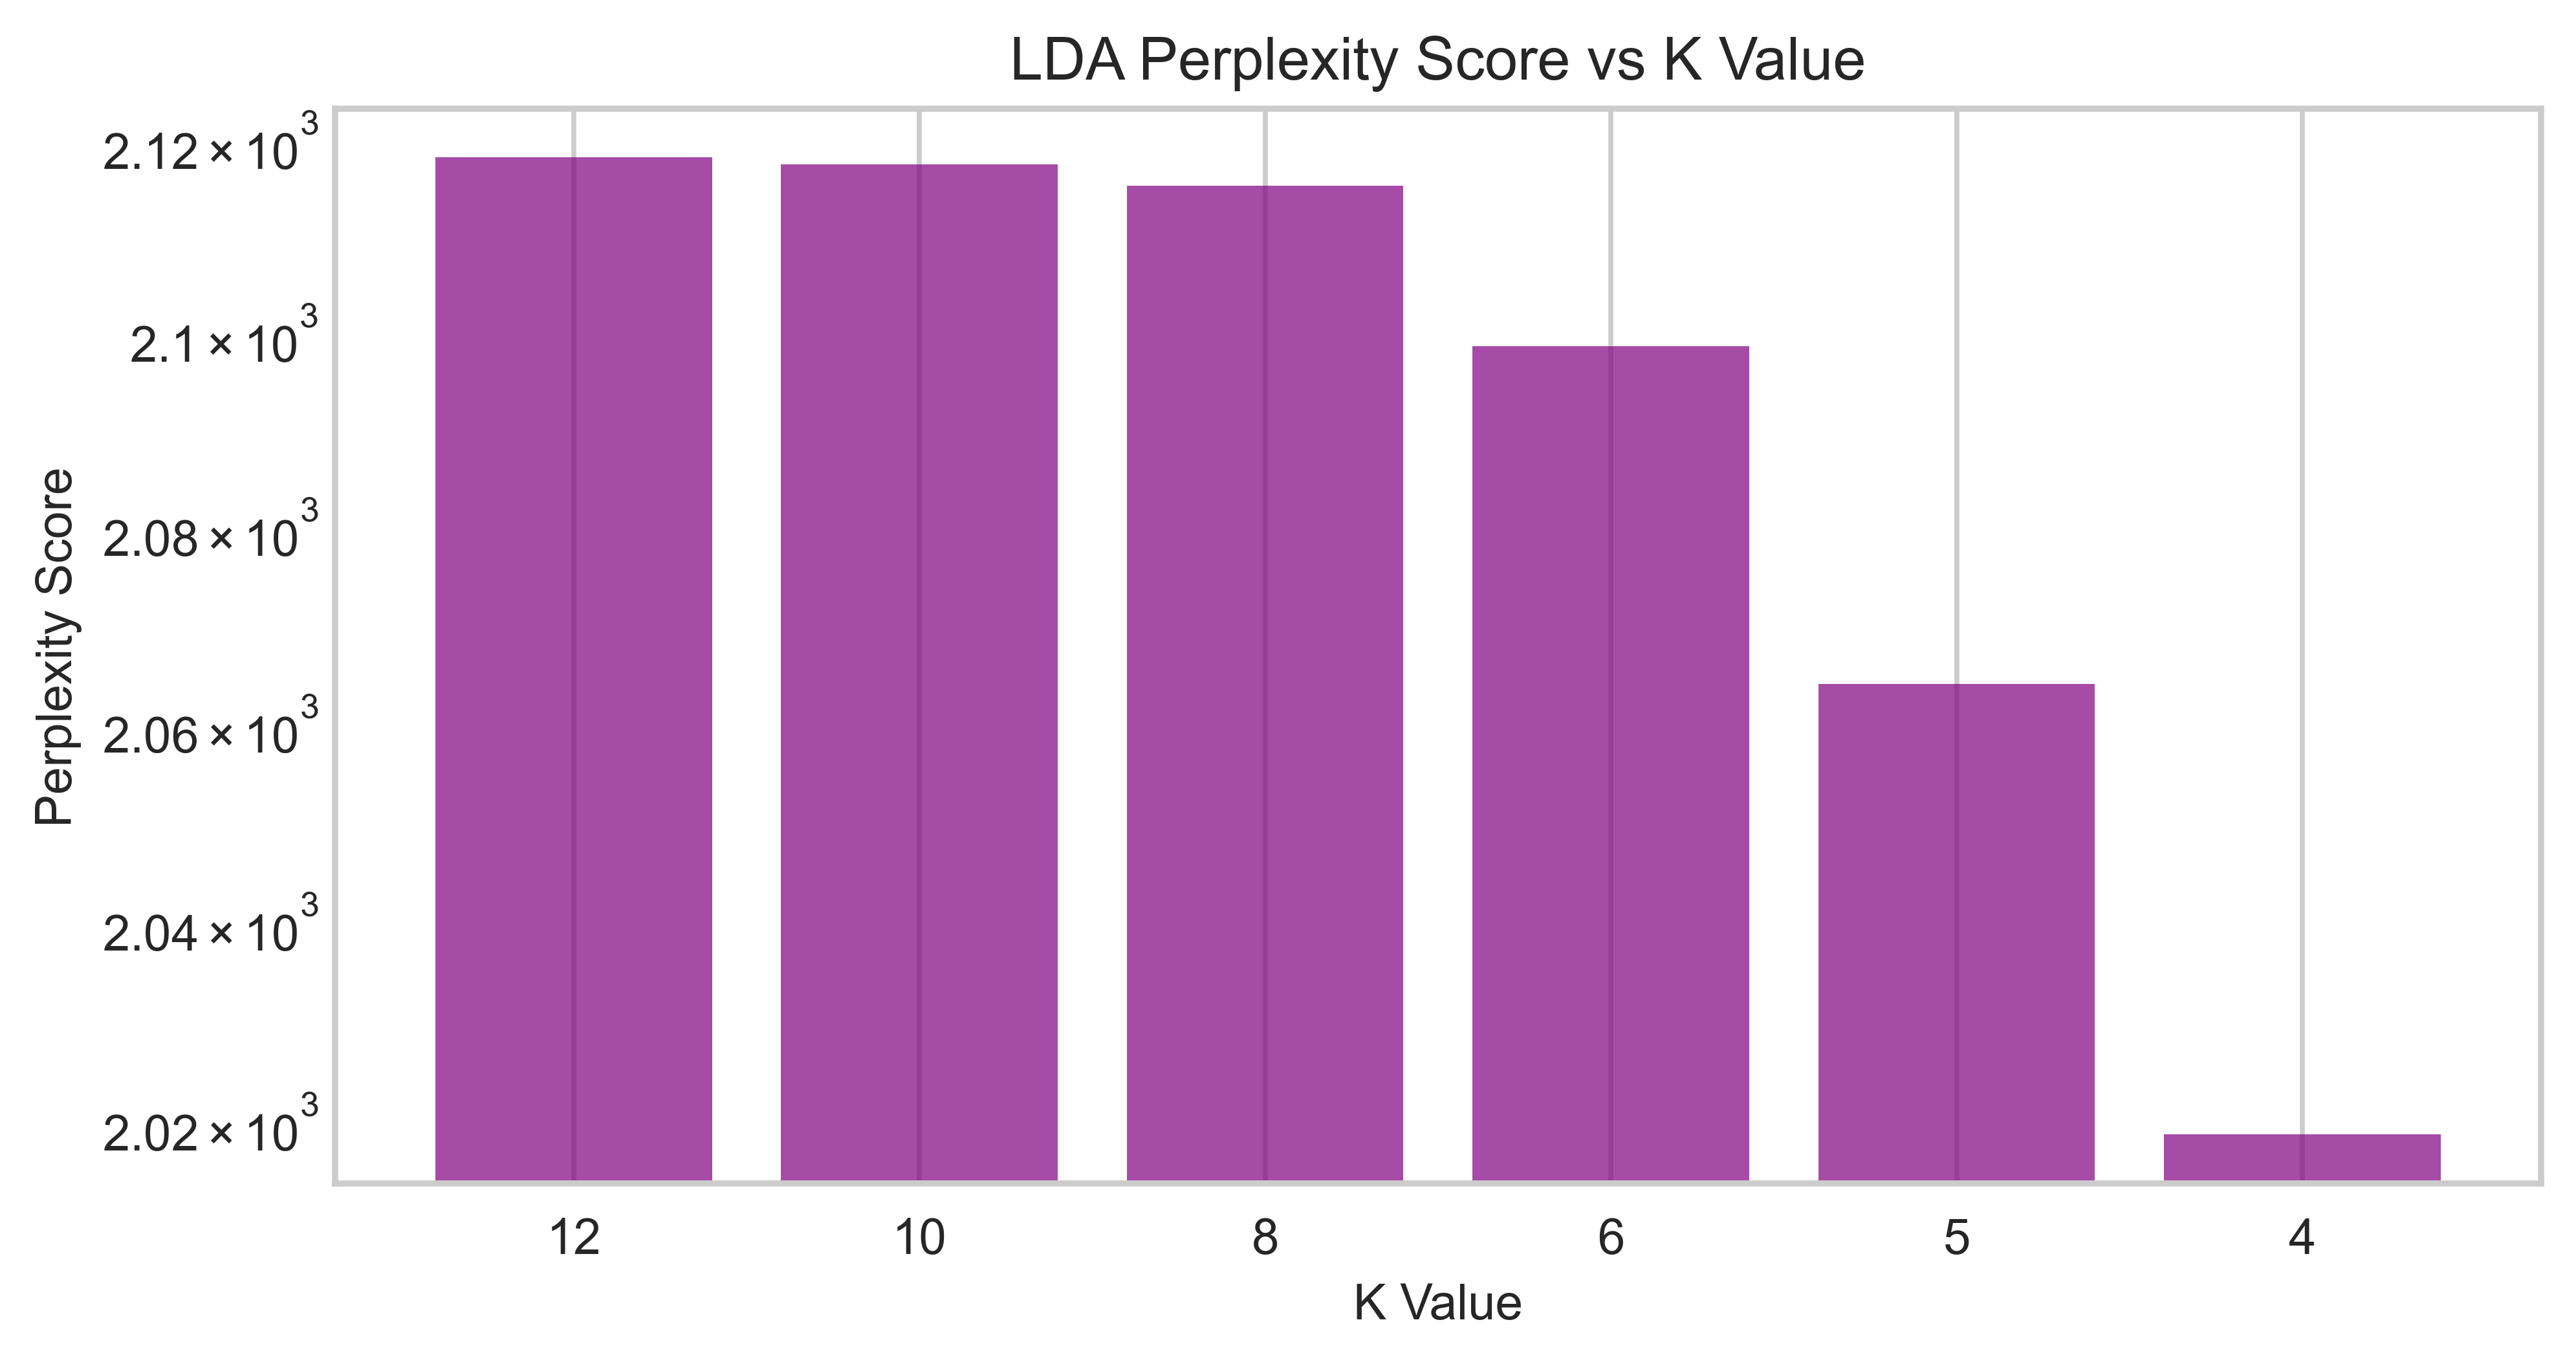

In [79]:
fig, ax = plt.subplots(figsize=(8,4), dpi=550)

y = pd.Series({'4':2018.95,
                '5':2064.25,
                '6':2098.82,
                '8':2115.45,
                '10':2117.67,
                '12':2118.41}).sort_values(ascending=False)


ax.bar(y.keys(), y, alpha=0.7, color='purple')

ax.set_title('LDA Perplexity Score vs K Value', fontsize=12)

ax.set_xlabel('K Value', fontsize=10)
ax.set_ylabel('Perplexity Score', fontsize=10)


ax.set_yscale('log')

plt.savefig('../images/lda_perplexity.png')
plt.show();


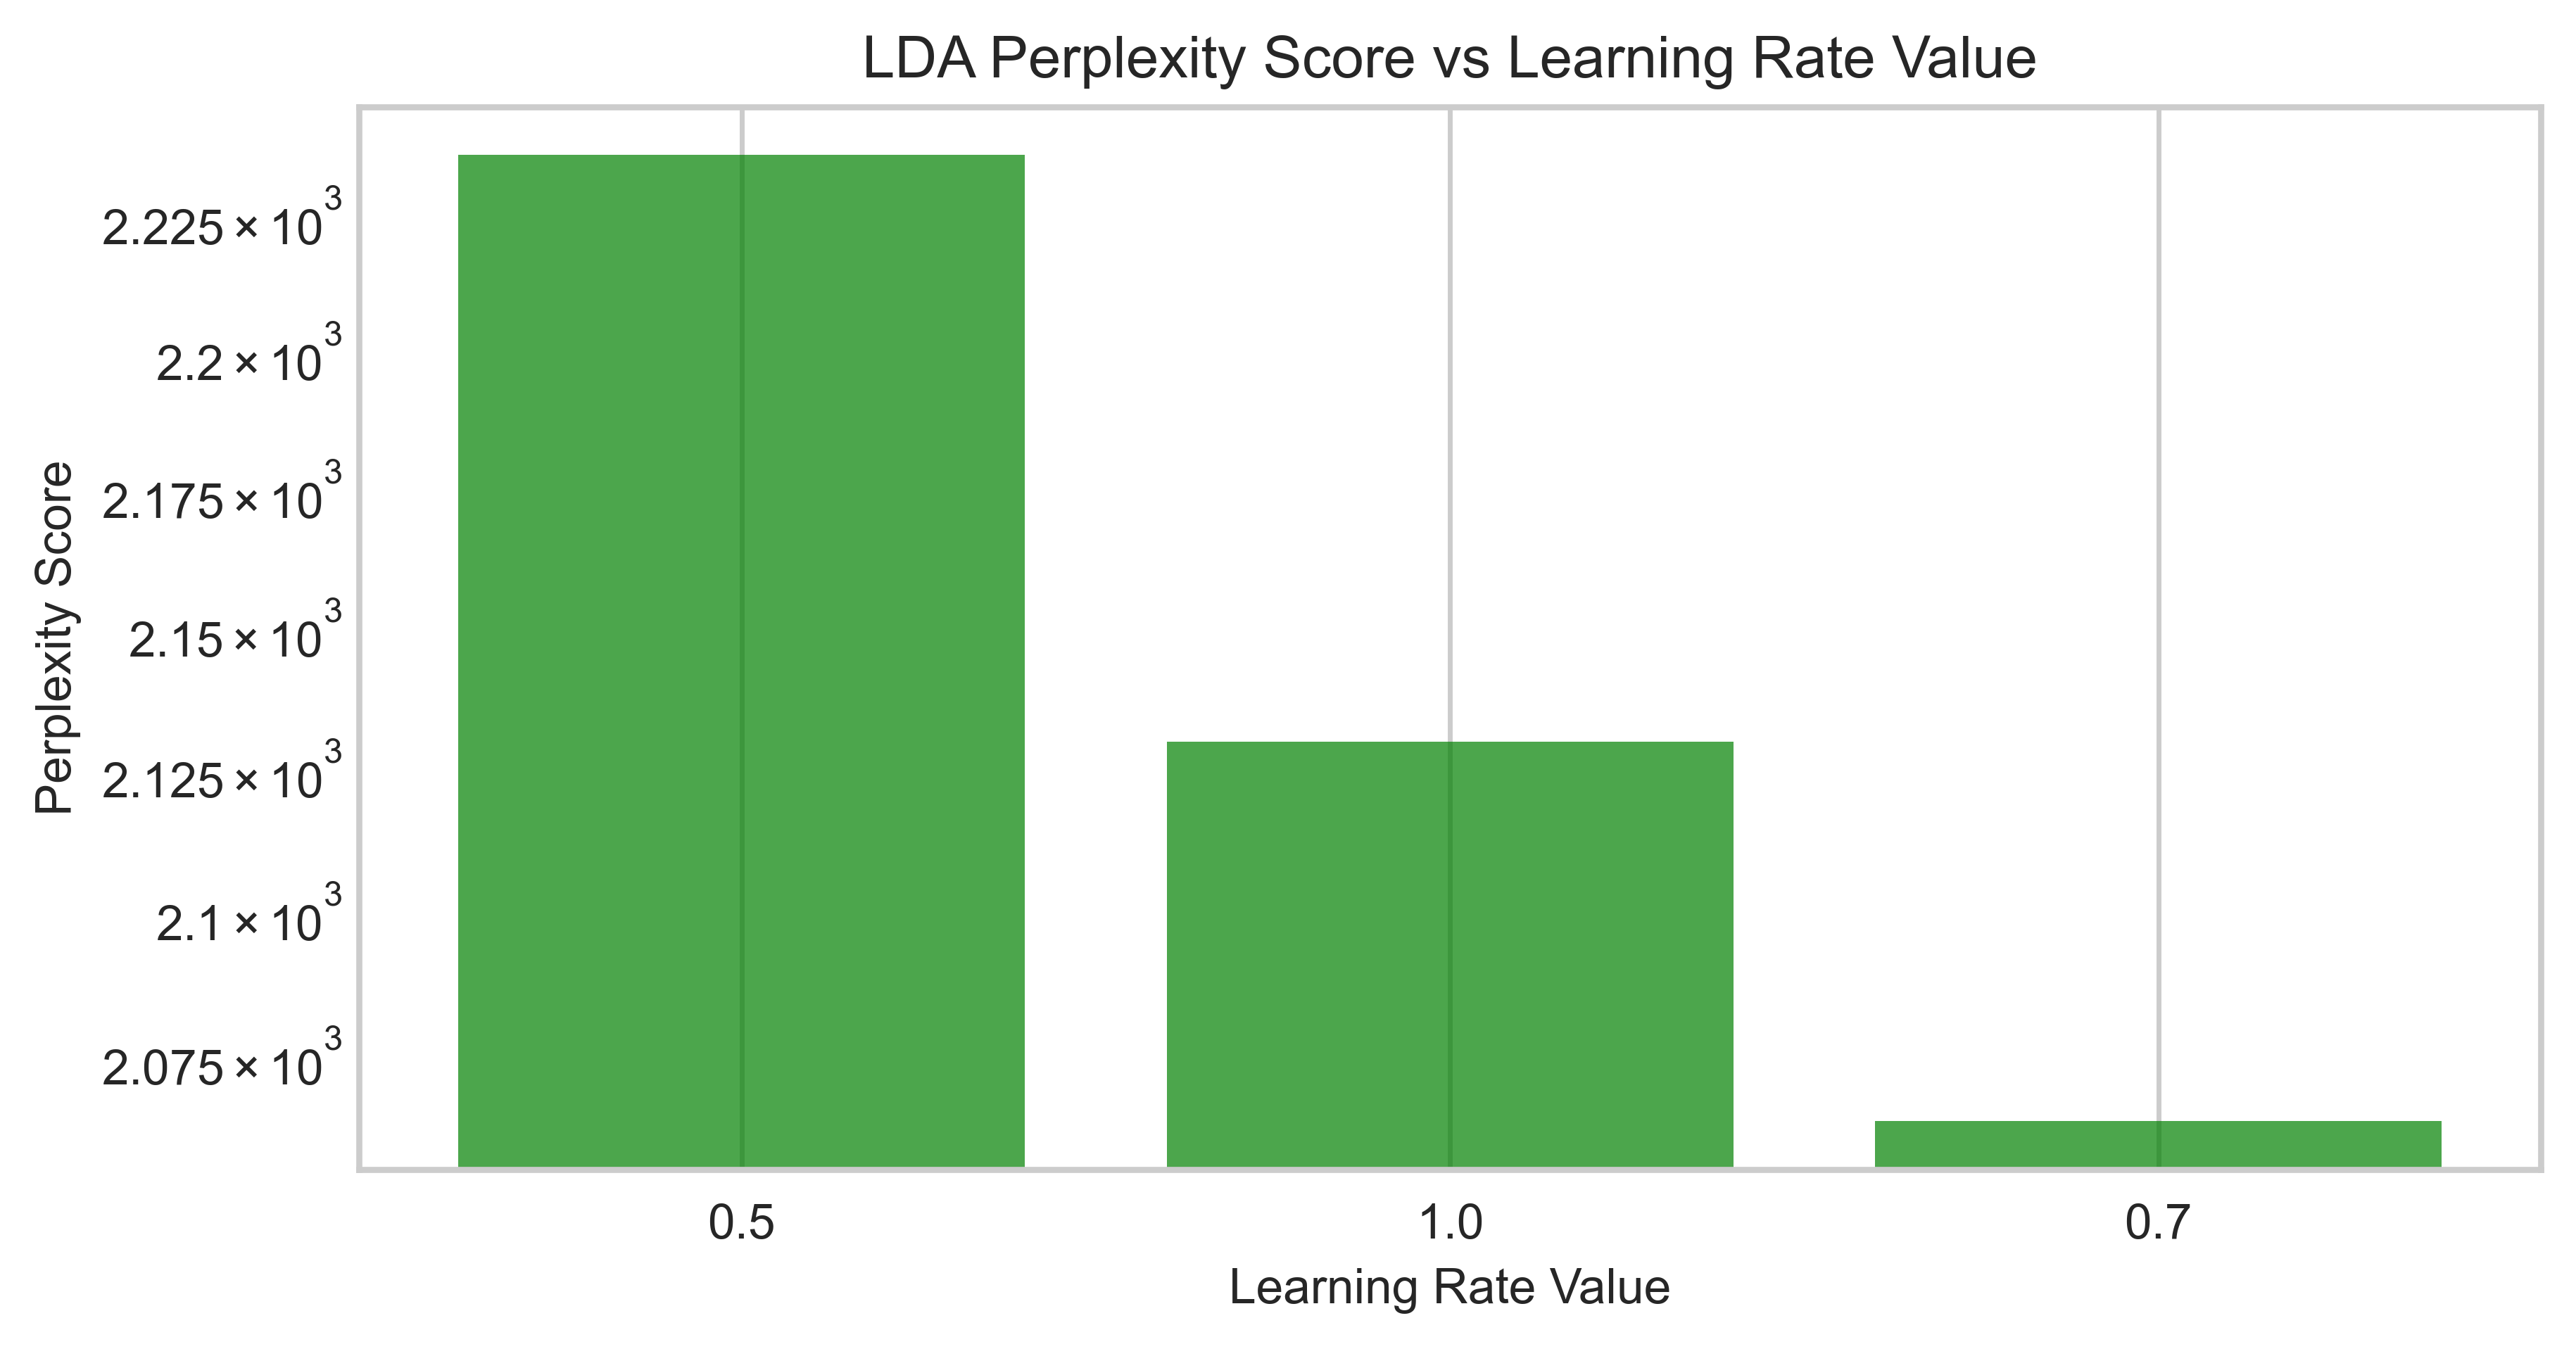

In [78]:
fig, ax = plt.subplots(figsize=(8,4), dpi=500)

y = pd.Series({'0.5':2236.7318894976393,
                '1.0':2130.2805347555213,
                '0.7':2064.253798134296}).sort_values(ascending=False)


ax.bar(y.keys(), y, alpha=0.7, color='green')

ax.set_title('LDA Perplexity Score vs Learning Rate Value', fontsize=12)

ax.set_xlabel('Learning Rate Value', fontsize=10)
ax.set_ylabel('Perplexity Score', fontsize=10)


ax.set_yscale('log')

plt.savefig('../images/lda_learningdecay.png')
plt.show();

In [29]:
X2 = vectorizer(ly, count_vec)

In [30]:
lda2 = LatentDirichletAllocation(n_components=5, learning_method='online',random_state=0)
lda2.fit(X2)
lda2.perplexity(X2)

2064.2537981343016

In [31]:
# lda3 = LatentDirichletAllocation(n_components=8, learning_method='online',random_state=0)
# lda3.fit(X2)
# lda3.perplexity(X2)

In [32]:
tf_feature_names = count_vec.get_feature_names()

def display_topics(feature_names, num_top_words, model):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))
        
display_topics(tf_feature_names, 50, lda2)

Topic 1:
long night home blue tonight play music hear comin bring radio dance sing roll ring swing woah lookin band song guitar songs morning doin christmas tryin little walkin young lord listen train tire tell school waitin wine country thinkin movin lovin runnin days gyal bass record alright rhythm good dancin
Topic 2:
away life heart feel live leave want world break think mind need tell look good change dream eye lose believe walk fall stay things tear inside turn love place long stand hand remember face true night better wanna little start wait girl lonely days wish forget wrong hard today hurt
Topic 3:
fuck money shit bitch wanna want tell gotta better good bout real party think need ready play talk look stop girl smoke game people damn everybody check roll drop kick head drink beat little goin start watch high work feel mouth sick talkin stick hard nothin ball straight shoot hand
Topic 4:
sing hear song sweet fall kiss word cold night sleep miss dream arm summer touch devil sound

In [33]:
lda_topic_matrix = pd.DataFrame(lda2.transform(X2)+1)

In [34]:
lda_topic_matrix.rename({0:'topic_1',1:'topic_2',2:'topic_3',3:'topic_4',4:'topic_5'}, 
                        axis=1, inplace=True)
lda_topic_matrix

,topic_1,topic_2,topic_3,topic_4,topic_5
0,1.002379,1.990544,1.002358,1.002358,1.002361
1,1.004318,1.540920,1.004295,1.053610,1.396858
2,1.008817,1.854465,1.008435,1.119892,1.008391
3,1.360804,1.368038,1.090449,1.176780,1.003929
4,1.004923,1.639502,1.004906,1.004990,1.345679
...,...,...,...,...,...
28367,1.048810,1.037523,1.766518,1.047695,1.099454
28368,1.050452,1.208232,1.457199,1.003541,1.280576
28369,1.002867,1.105549,1.753683,1.002769,1.135133
28370,1.003340,1.003368,1.906971,1.030241,1.056080


In [35]:
pd.set_option('display.max_columns', None)

final_df = pd.concat([ly, lda_topic_matrix], axis=1)

ly['topic'].unique()

array(['sadness', 'world/life', 'music', 'romantic', 'violence',
       'obscene', 'night/time', 'feelings'], dtype=object)

In [36]:
final_df.drop(['len', 'dating','violence','world/life','night/time', 'shake the audience','family/gospel','romantic',
              'communication', 'obscene','music','movement/places','light/visual perceptions','family/spiritual',
               'like/girls', 'topic', 'age'], axis=1, inplace=True)

In [37]:
final_df.loc[final_df['artist_name']=='john mayer'][0:4].values

array([['john mayer', 'back to you', 1999, 'pop',
        'come try forget try stay away late yeah good forget quit game play forgive turn walk away come walk sleep silhouette yeah smile picture leave light leave light yeah know come scare strong',
        0.6556465320463349, 0.04200996615927877, 0.58518358063468,
        0.6353101043509473, 0.0748986695769775, 0.13461538461538464,
        0.5239076669414674, 0.6376263202614536, 1.0074850201929044,
        1.8807003006448322, 1.0075369035288366, 1.0641943923475974,
        1.0400833832858292],
       ['john mayer', 'love soon', 1999, 'pop',
        'know swear read complaint need older warn live take expect kiss time look eye come face come face time cross line want call soon close mind waste time call soon mother complain need mention friends know best keep secret understand wasn plan dollar short minute early come face come face time cross line want call soon close mind waste time call soon bypass bullshit minute hand move faster thi

In [38]:
#User profile sample
user_profile = final_df.loc[final_df['artist_name']=='john mayer']

In [39]:
#Item Profile Sample
item_profile = final_df.drop(final_df[final_df['artist_name'] == 'john mayer'].index).reset_index()
item_profile.drop('index',axis=1, inplace=True)

In [40]:
# Cossine Similarity
from sklearn.metrics.pairwise import cosine_similarity 

user = pd.DataFrame(user_profile.iloc[1, 5:]).T
cosine_similarity(user , item_profile.iloc[:, 5:])[0]

array([0.93727764, 0.97754035, 0.98873362, 0.93822453, 0.9829236 ,
       0.955914  , 0.96807411, 0.98002897, 0.96947116, 0.97762802,
       0.97365989, 0.9487296 , 0.95095315, 0.96775599, 0.95243268,
       0.95881321, 0.90013626, 0.94005402, 0.9473551 , 0.95760145,
       0.98069795, 0.98572242, 0.96609135, 0.97706341, 0.94831438,
       0.9508208 , 0.94757331, 0.93365874, 0.94631852, 0.92265596,
       0.94577265, 0.97467058, 0.96286835, 0.98629908, 0.99164831,
       0.95756791, 0.98408391, 0.97405573, 0.9015999 , 0.93527752,
       0.99005542, 0.88000336, 0.99294259, 0.99419674, 0.98453995,
       0.97524282, 0.98440692, 0.96711003, 0.93520525, 0.9403528 ,
       0.93195255, 0.94307466, 0.95536182, 0.90455586, 0.9820049 ,
       0.97694258, 0.96619619, 0.95388259, 0.98344046, 0.96088253,
       0.90963957, 0.91065219, 0.97529716, 0.96463881, 0.93951925,
       0.96498336, 0.92163468, 0.93035728, 0.95237801, 0.96484829,
       0.97843428, 0.96819636, 0.97942455, 0.94585423, 0.99218

In [41]:
cosine_similarities = cosine_similarity(user , item_profile.iloc[:, 5:])

similar_indices = cosine_similarities[0].argsort()[:-11:-1] 
similar_items = [item_profile.iloc[i] for i in similar_indices] 

recommender=pd.DataFrame(similar_items)

user

,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic_1,topic_2,topic_3,topic_4,topic_5
4679,0.000634115,0.000634115,0.692408,0.651745,0.839357,0.000326923,0.556884,0.356336,1.08622,1.83589,1.04074,1.00295,1.03419


In [42]:
# user_words = input('Words:')
# user_feature_matrix = count_vec.transform(pd.Series(user_words))

# user_topic = lda2.transform(user_feature_matrix)

# user_topic
np.percentile(final_df['sadness'].values, 25)

0.0011441647918423118

In [43]:
def percentiles(col, df=final_df):
    a = np.percentile(df[col].values, [25,50,75]).tolist()
    end =[round(i , 5) for i in a]
    return end

a = percentiles('sadness')
b = percentiles('danceability')
c = percentiles('acousticness')
d = percentiles('instrumentalness')
e = percentiles('valence')
f = percentiles('energy')

In [66]:
def song_recommender(num=5):
    
    user_words = input('Enter words:')
    print('\n''Input Parameters from 0 to 1:')
    print('4 or more decimal points recommended for precision.')
    print('If Parameter is null, enter 0''\n')

    print('For Parameter Definitions go to:')
    print('https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/''\n')

    print(f'Sadness Average: {round(final_df.sadness.values.mean(),3)}')
    print(f'Sadness Percentiles:{a}')
    sadness = float(input('Sadness:'))
          
    print('\n'f'Average Danceability: {round(final_df.danceability.values.mean(),3)}')
    print(f'Danceability Percentiles: {b}')
    danceability = float(input('Danceability:'))
          
    print('\n'f'Average Acousticness: {round(final_df.acousticness.values.mean(),3)}')
    print(f'Acousticness Percentiles: {c}')
    acousticness = float(input('Acousticness:'))
          
          
    print('\n'f'Average Valence: {round(final_df.valence.values.mean(),3)}')  
    print(f'Valence Percentiles: {e}')
    valence = float(input('Valence:'))
          
    print('\n'f'Average Energy: {round(final_df.energy.values.mean(),3)}')
    print(f'Energy Percentiles: {f}')
    energy = float(input('Energy:'))
            
        
    user_feature_matrix = count_vec.transform(pd.Series(user_words))
    user_topic = lda2.transform(user_feature_matrix)
    
    user = [sadness, danceability, acousticness,valence,energy]
    
    user.extend(user_topic[0])
    user = np.array(user).reshape(1,-1)
        
    cosine_similarities = cosine_similarity(user , final_df.loc[:,['sadness',
                                                                   'danceability',
                                                                   'acousticness',
                                                                  'valence',
                                                                  'energy',
                                                                  'topic_1',
                                                                  'topic_2',
                                                                  'topic_3',
                                                                  'topic_4',
                                                                  'topic_5']])

    similar_indices = cosine_similarities[0].argsort()[:-(num+1):-1] 
    similar_items = [final_df.iloc[i] for i in similar_indices] 


    recommender=pd.DataFrame(similar_items)
    return recommender.iloc[:,:5]

song_recommender(20)

Enter words:strangers living together we had it all us to be

Input Parameters from 0 to 1:
4 or more decimal points recommended for precision.
If Parameter is null, enter 0

For Parameter Definitions go to:
https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

Sadness Average: 0.129
Sadness Percentiles:[0.00114, 0.00526, 0.23511]
Sadness:0.0023

Average Danceability: 0.533
Danceability Percentiles: [0.41298, 0.53861, 0.65667]
Danceability:0.4555

Average Acousticness: 0.339
Acousticness Percentiles: [0.03424, 0.2259, 0.63253]
Acousticness:0.55666

Average Valence: 0.533
Valence Percentiles: [0.32914, 0.53937, 0.73825]
Valence:0.766

Average Energy: 0.57
Energy Percentiles: [0.38036, 0.58057, 0.77277]
Energy:0.3344


,artist_name,track_name,release_date,genre,lyrics
7221,johnny cash,there you go,1958,country,go break heart gonna tell go know gonna breaki...
21089,jimmy cliff,better days are coming,1973,reggae,better days come hearted trouble joy come bett...
21736,the melodians,"hey, girl",1992,reggae,girl long time see girl give begin darling sta...
68,lata mangeshkar,antar mantar jantar,1956,pop,chain heart free grow cold longer care go hear...
21205,dennis brown,when i am down,1978,reggae,problems life good time thankful time come tom...
7327,don gibson,my hands are tied,1960,country,hand tie yeah hand tie baby tonight like hold ...
5651,adele,right as rain,2008,pop,want right rain better wrong excitement bone g...
384,neil sedaka,breaking up is hard to do,1960,pop,tell leave believe true girl live away leave h...
116,harry belafonte,cordelia brown,1957,pop,look good things smile people believe ways rai...
7405,johnny cash,life goes on,1961,country,baby leave guess things forget go time go life...


In [45]:
def genre_specific(genre, num=5):
    x = song_recommender(num)
    return x.loc[x['genre']==genre]

In [46]:
import scipy.stats as stats
x = final_df.sadness.values

normal = stats.norm(x.mean(), x.std())

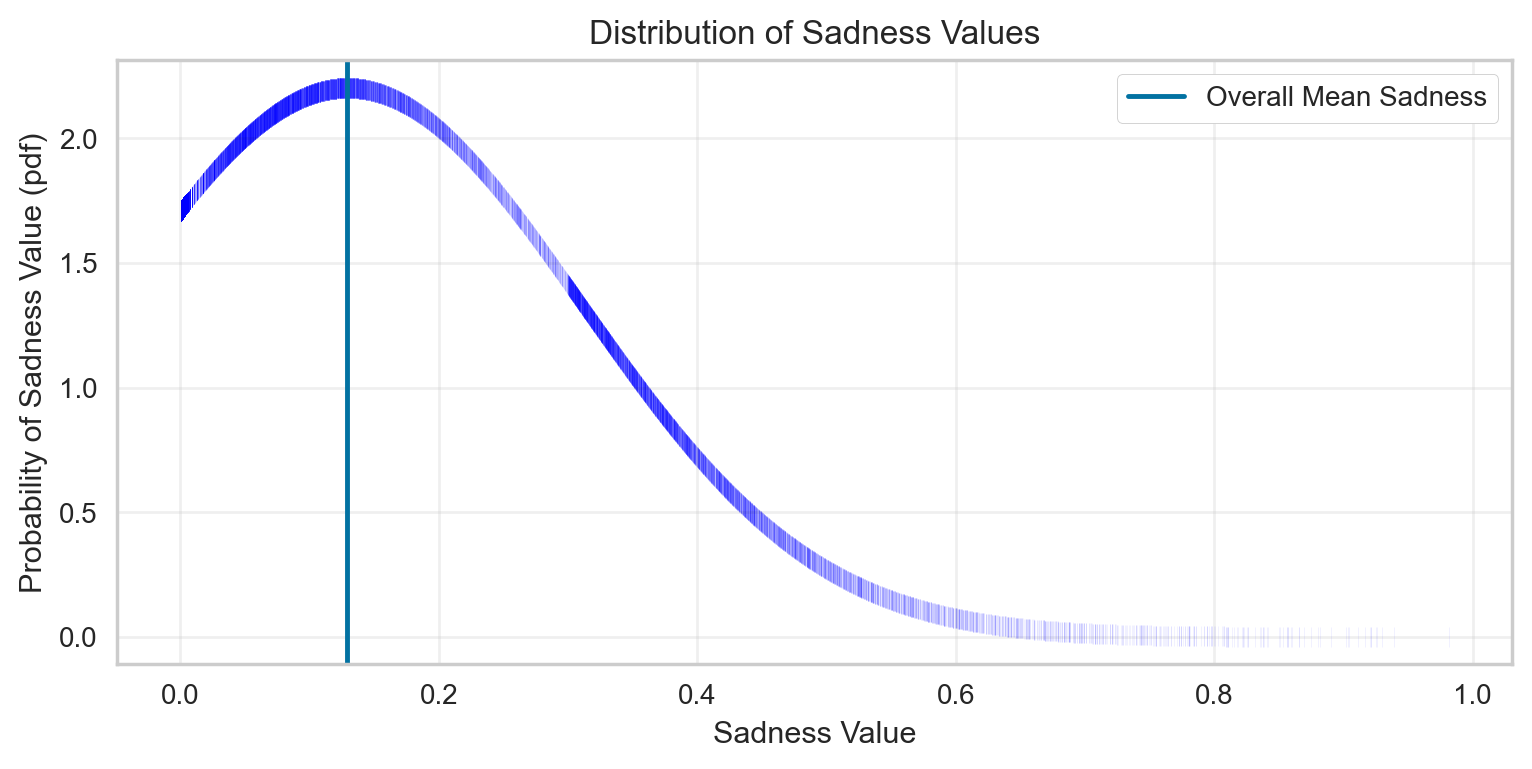

In [55]:
    x = final_df.sadness.values
    normal = stats.norm(x.mean(), x.std())
    x2 = ly.loc[ly['artist_name']=='taylor swift'].sadness.values
    x3 = ly.loc[ly['artist_name']=='iron maiden'].sadness.values


    fig, ax = plt.subplots(figsize=(9, 4), dpi=200)

    ax.scatter(x, normal.pdf(x), linewidth=0.2, marker='|',color='blue', alpha=0.1000)

    # ax.set_ylim(0.5, 2.5)
    # ax.set_xlim(0, 0.4)

    ax.set_xlabel('Sadness Value')
    ax.set_ylabel('Probability of Sadness Value (pdf)')

    ax.set_title("Distribution of Sadness Values")

    ax.grid(alpha=0.3)

    # ax.set_yticks([])
#     ax.axvline(x2.mean(), color='k', linestyle='--', label='Taylor Swift Mean Sadness')
#     ax.axvline(x3.mean(), color='r', linestyle='--', label=' Iron Maiden Mean Sadness')
    ax.axvline(x.mean(), color='b', linestyle='-', label='Overall Mean Sadness')
    ax.legend(frameon=True, facecolor='white', framealpha=1)


plt.savefig('../images/sadnessdistribution.png')
plt.show()

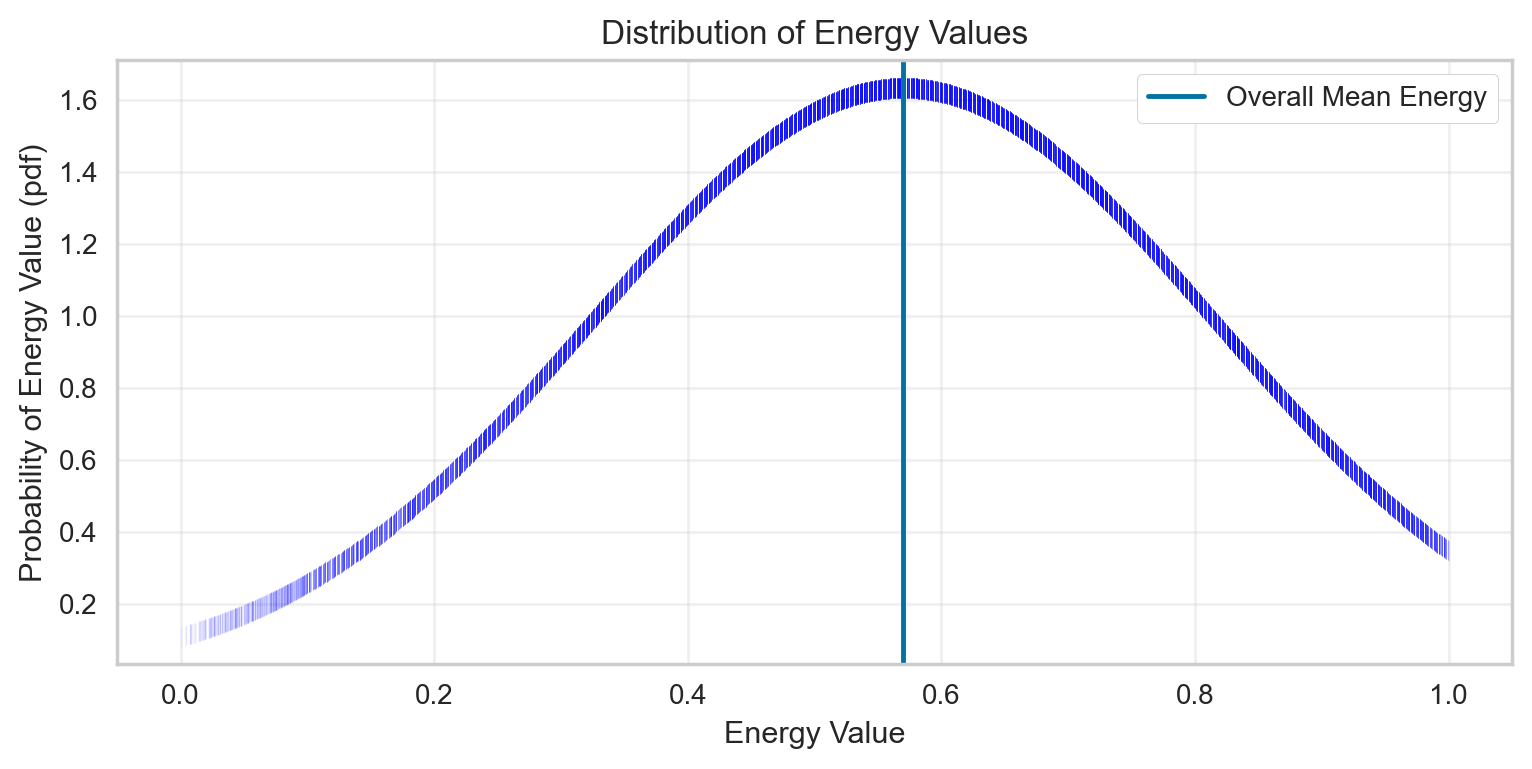

In [48]:
def feature_distribution(df, feature_name):
    '''
    Distribution of any normally distributed feature
    input:
        feature: np.array() of feature values
        feature_name: str. Name of feature for plot title
    '''
    x = df[feature_name]

    normal = stats.norm(x.mean(), x.std())
    fig, ax = plt.subplots(figsize=(9, 4), dpi=200)

    ax.scatter(x, normal.pdf(x), linewidth=0.2, marker='|',color='blue', alpha=0.1000)


    ax.set_xlabel(f'{feature_name.capitalize()} Value')
    ax.set_ylabel(f'Probability of {feature_name.capitalize()} Value (pdf)')

    ax.set_title(f"Distribution of {feature_name.capitalize()} Values")

    ax.grid(alpha=0.3)

    # ax.set_yticks([])
    
    ax.axvline(x.mean(), color='b', linestyle='-', label=f'Overall Mean {feature_name.capitalize()}')
    ax.legend(frameon=True, facecolor='white', framealpha=1)
    
    plt.savefig(f'../images/{feature_name}.png')
    plt.show()

    #'sadness','danceability','acousticness','valence','energy',
feature_distribution(final_df, 'energy')

In [49]:
ly.columns

Index(['artist_name', 'track_name', 'release_date', 'genre', 'lyrics', 'len',
       'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'like/girls', 'sadness', 'feelings', 'danceability', 'loudness',
       'acousticness', 'instrumentalness', 'valence', 'energy', 'topic',
       'age'],
      dtype='object')

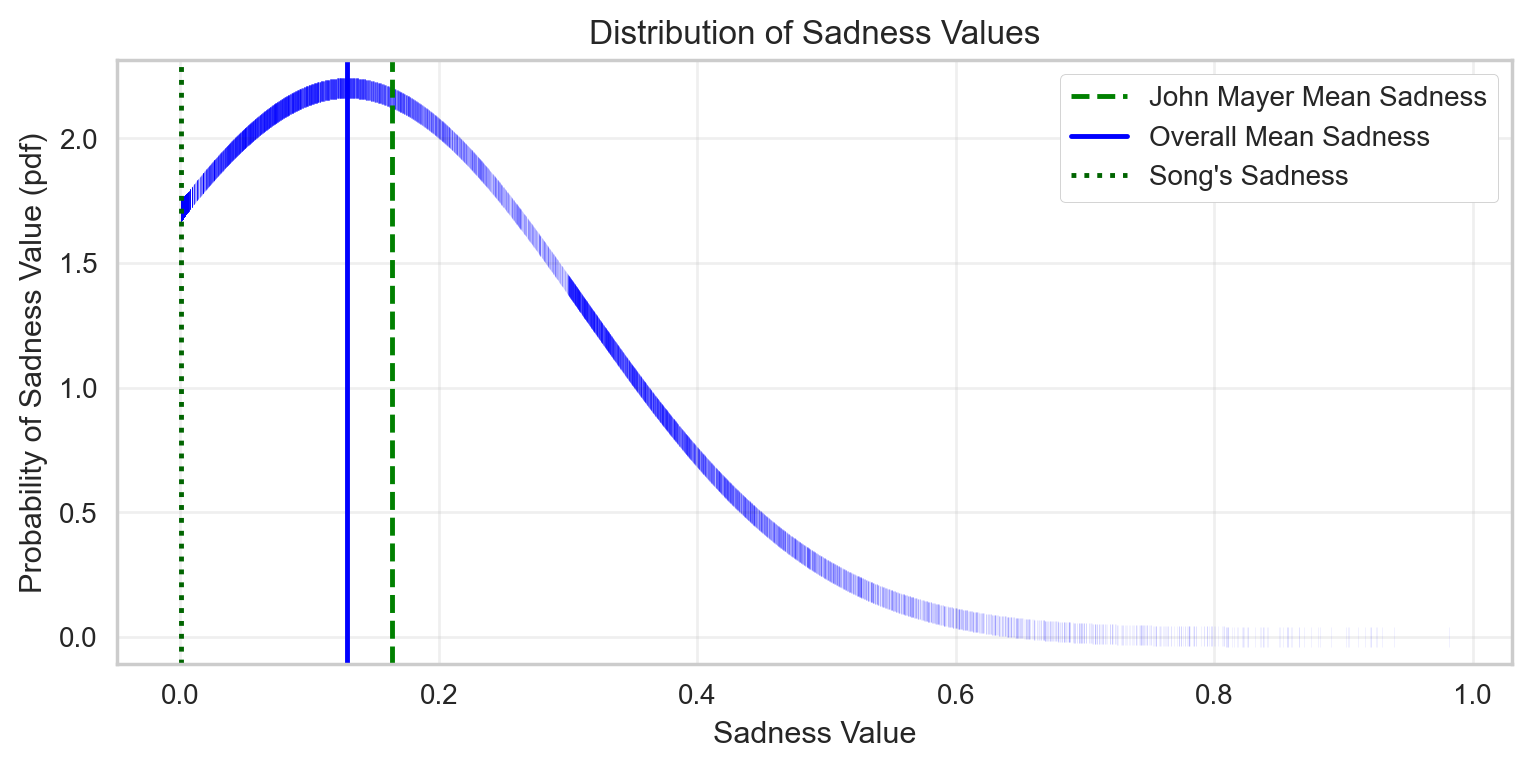

In [64]:
def artist_feature_mean(df, feature_name, artist_name, sadness_color='blue', artist_color='black'):
    '''
    Feature mean of specific artist over feature distribution plot
    '''
    x = df[feature_name]
    normal = stats.norm(x.mean(), x.std())

    x2 = df.loc[ly['artist_name']==artist_name]
    x2 = x2[feature_name]
    
    x3 = final_df.loc[ly['track_name']=='waiting on the world to change'].sadness.values


    fig, ax = plt.subplots(figsize=(9, 4), dpi=200)

    ax.scatter(x, normal.pdf(x), linewidth=0.2, marker='|',color='blue', alpha=0.1000)

    # ax.set_ylim(0.5, 2.5)
    # ax.set_xlim(0, 0.4)

    ax.set_xlabel(f'{feature_name.capitalize()} Value')
    ax.set_ylabel(f'Probability of {feature_name.capitalize()} Value (pdf)')

    ax.set_title(f"Distribution of {feature_name.capitalize()} Values")

    ax.grid(alpha=0.3)
    

    # ax.set_yticks([])
    ax.axvline(x2.mean(), color=artist_color, linestyle='--', label=f'{artist_name.title()} Mean {feature_name.capitalize()}')
    ax.axvline(x.mean(), color=sadness_color, linestyle='-', label=f'Overall Mean {feature_name.capitalize()}')
    ax.axvline(x3, color='darkgreen', linestyle=':', alpha=1, label=f"Song's {feature_name.capitalize()}")

    
    ax.legend(frameon=True, facecolor='white', framealpha=1)
    plt.savefig('../images/johnmayersadness.png')
    plt.show()
    
artist_feature_mean(final_df, 'sadness', 'john mayer', artist_color='green')

In [ ]:
final_df.loc[ly['track_name']=='waiting on the world to change'].sadness.values

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(
    background_color='white',
    max_words=2000)

word_cloud = ['Danceability', 'Loudness', "Acousticness","Instrumentalness","speechiness","Energy",
             'liveness','Valence','tempo','mode']
string = ""
word_cloud_country = (' ').join(word_cloud)
wc.generate(word_cloud_country)

fig, ax1 = plt.subplots(1, 1, figsize=(1.6,1), dpi=600)

ax1.imshow(wc, interpolation='bilinear')

ax1.axis('off')
plt.savefig('../images/acousticfeatures.png')
plt.show();


In [ ]:
wc2 = WordCloud(
    background_color='white',
    max_words=2000)

for topic_idx, topic in enumerate(lda2.components_):
        word_cloud2 = " ".join([feature_names[i]
                        for i in topic.argsort()[:-(10 + 1):-1]])

string = ""
word_cloud_country = (' ').join(word_cloud)
wc.generate(word_cloud_country)

fig, ax1 = plt.subplots(1, 1, figsize=(4,8), dpi=700)

ax1.imshow(wc, interpolation='bilinear')

ax1.axis('off')
plt.savefig('../images/acousticfeatures.png')
plt.show();

for topic_idx, topic in enumerate(lda2.components_):
        print("Topic %d:" % (topic_idx+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-(10 + 1):-1]]))

In [57]:
final_df.loc[ly['track_name']=='waiting on the world to change']

,artist_name,track_name,release_date,genre,lyrics,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic_1,topic_2,topic_3,topic_4,topic_5
5485,john mayer,waiting on the world to change,2006,pop,friends misunderstand stand go wrong world lea...,0.000642,0.04494,0.558107,0.764992,0.159638,0.000235,0.658904,0.756749,1.019641,1.941845,1.002353,1.033805,1.002357


In [58]:
table = song_recommender(20)

Enter words:friends understand stand go world change leader misunderstood

Input Parameters from 0 to 1:
4 or more decimal points recommended for precision.
If Parameter is null, enter 0

For Parameter Definitions go to:
https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

Sadness Average: 0.129
Sadness Percentiles:[0.00114, 0.00526, 0.23511]
Sadness:0.000642

Average Danceability: 0.533
Danceability Percentiles: [0.41298, 0.53861, 0.65667]
Danceability:0.04494

Average Acousticness: 0.339
Acousticness Percentiles: [0.03424, 0.2259, 0.63253]
Acousticness:0.558107

Average Valence: 0.533
Valence Percentiles: [0.32914, 0.53937, 0.73825]
Valence:0.658904

Average Energy: 0.57
Energy Percentiles: [0.38036, 0.58057, 0.77277]
Energy:0.756749


In [59]:
table[0:4]['lyrics'].values

array(['think yesterday wrong open door say call want turn head start pretend see know long think prize finally come sense hear lie call want turn head start pretend see know long talk time yesterday go mean thing fade fast memory call want turn head start pretend see know long talk time yesterday go mean thing fade fast memory talk time yesterday go mean thing fade fast memory fade fast memory',
       'change change change cause want change change night change prove change ways change blind cause need change change night change change leave leave change change change cause want change change night change change',
       'feel like close right leave slip away purpose break spirit interest heart want fall start want want want want know terribly cruel like try stay gonna spare feel cause watch suffer feel better destruction lover want say want want want want close right leave slip away purpose break spirit interest heart destruction lover want say want want want want',
       'fine driv

In [63]:
final_df.loc[final_df['track_name']=='when love has grown']

,artist_name,track_name,release_date,genre,lyrics,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic_1,topic_2,topic_3,topic_4,topic_5
18085,george benson,when love has grown,1973,jazz,come call better home know pain walk life come...,0.245757,0.020935,0.461713,0.453401,0.978916,0.867409,0.545548,0.366347,1.00708,1.97194,1.006957,1.007032,1.00699


In [65]:
final_df.sadness.values.mean()

0.1293893328211119